## Project: 
# Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

We are provided the training and the test data as pickle files which can be loaded easily into our environment. The following code loads the data saved in pickle format and verifies that it is not currupted by printing some details such as length and shapes.

In [1]:
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sb
import pandas as pd
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# Paths to pickle files

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

# Loading the pickle data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Printing shapes of loaded data
print('X_train shape', X_train.shape)
print('Y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('Y_test shape', y_test.shape)

X_train shape (34799, 32, 32, 3)
Y_train shape (34799,)
X_test shape (12630, 32, 32, 3)
Y_test shape (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# Shape of an traffic sign image
image_shape = (X_train.shape[1:])

# Number of unique classes/labels in the dataset
n_classes = len(np.unique(y_train))

classes = [x for x in range(n_classes)]
class_counts = [np.count_nonzero(y_train ==y) for y in classes]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

1. Visualizing the German Traffic Signs Dataset using the pickled file(s). 
2. Ploting a histogram to see the distribution of data

Reference:
The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

In [4]:
sign_names_df = pd.read_csv('signnames.csv')
sign_names_df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [5]:
sign_names_df['Freequency'] = class_counts
sign_names_df

,ClassId,SignName,Freequency
0,0,Speed limit (20km/h),180
1,1,Speed limit (30km/h),1980
2,2,Speed limit (50km/h),2010
3,3,Speed limit (60km/h),1260
4,4,Speed limit (70km/h),1770
5,5,Speed limit (80km/h),1650
6,6,End of speed limit (80km/h),360
7,7,Speed limit (100km/h),1290
8,8,Speed limit (120km/h),1260
9,9,No passing,1320


Create a global variable for sign names

In [6]:
SIGN_NAMES = sign_names_df.SignName.values
SIGN_NAMES[20]

'Dangerous curve to the right'

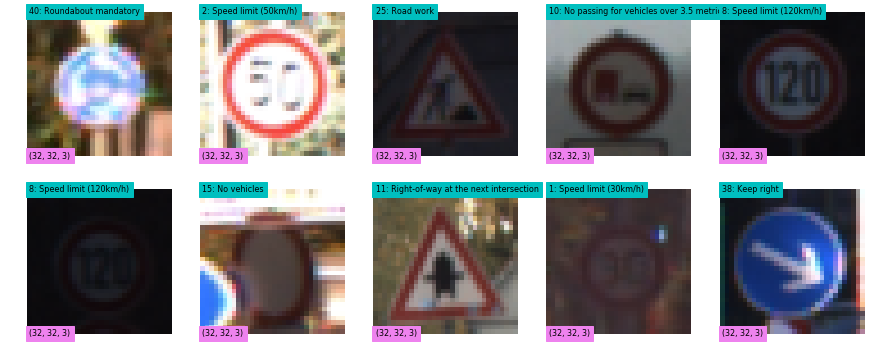

In [7]:
# Randomly picking some images from our dataset and showing it togather with the class they belong and size

figure, axis = plt.subplots(2,5, figsize=(15,6))
axis = axis.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    image_class = y_train[index]
    axis[i].axis('off')
    axis[i].text(0, 0, '{}: {}'.format(image_class, SIGN_NAMES[image_class]), color='k',backgroundcolor='c', fontsize=8) 
    axis[i].text(0, image.shape[0], '{}'.format(image.shape), color='k',backgroundcolor='violet', fontsize=8) 
    axis[i].imshow(image)
#     axis[i].set_title(y_train[index])

In [8]:
# Showing images of a purticular class

def get_sample(index):
    '''
    Returns list of images of passed index
    '''
    indices = np.where(y_train == index)
    return X_train[indices]

def show_class(examples_per_sign = 20, sign_index = 33, cmap=None):
    '''
    Show images of a given class
    '''
    print(str(sign_index) + '. ' + SIGN_NAMES[sign_index])
    fig = plt.figure(figsize = (examples_per_sign, 1))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    for i in range(examples_per_sign):
        image = get_sample(sign_index)[i]
        axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
        image = image.squeeze()
        axis.imshow(image, cmap=cmap)
    plt.show()

0. Speed limit (20km/h)


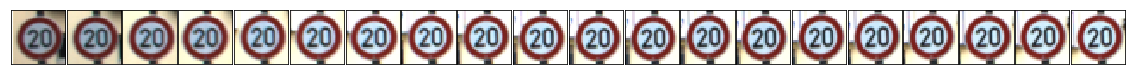

1. Speed limit (30km/h)


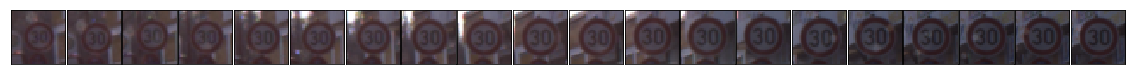

2. Speed limit (50km/h)


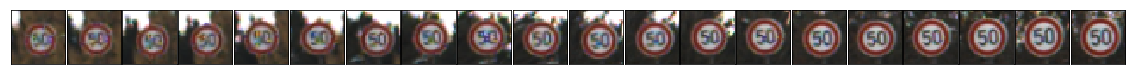

In [9]:
# Show the images

for x in range(3):
    show_class(sign_index=x) 

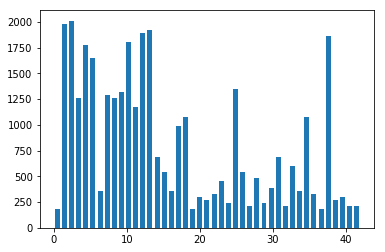

In [10]:
#Ploting histogram

hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

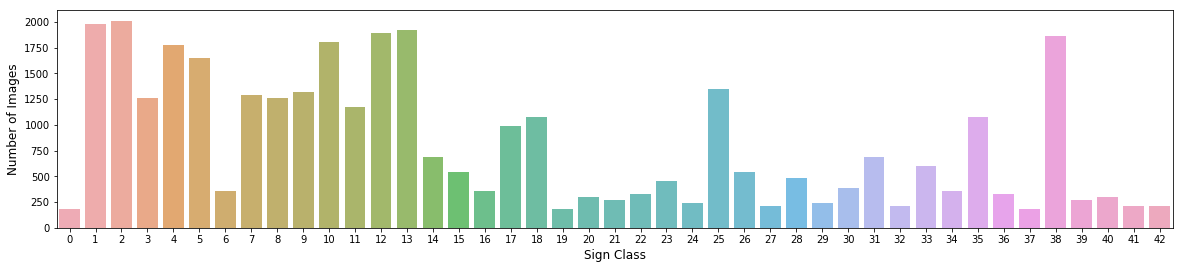

In [11]:
#Colorful plot

plt.figure(figsize=(20,4))

# print(hist, bins)
sb.barplot(classes, class_counts, alpha=0.8, )
plt.xlabel('Sign Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) was a solid starting point. 


### Pre-process the Data Set (normalization, grayscale, etc.)

Now we apply different pre-processing steps such as normalization, converting to grayscale, different color spaces etc. You can see which preprocessing gives the maximum performance.

#### 1. Converting to grayscale

In [12]:
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)

print(X_train.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)


0. Speed limit (20km/h)


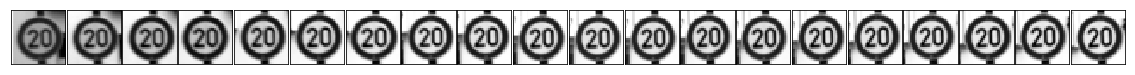

1. Speed limit (30km/h)


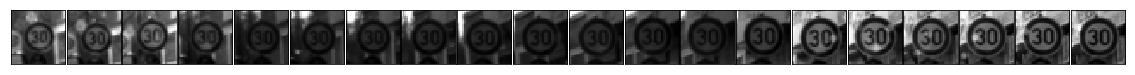

2. Speed limit (50km/h)


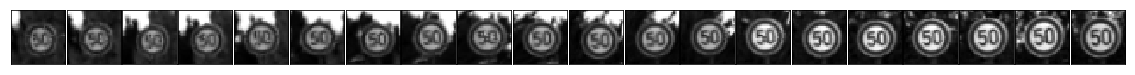

In [13]:
# Visualize grayscale images

for x in range(3):
    show_class(sign_index=x, cmap='gray') 

#### 2. Normalizing the images 

In [14]:
#Printing the mean of the training and the testing dataset

print(np.mean(X_train))
print(np.mean(X_test))

82.677589037
82.1484603612


In [15]:
# Normalizing the images data

X_train = (X_train - 128)/128
X_test = (X_test - 128)/128

In [16]:
#Printing the mean of the training and the testing dataset after normalization

print(np.mean(X_train))
print(np.mean(X_test))

-0.354081335648
-0.358215153428


0. Speed limit (20km/h)


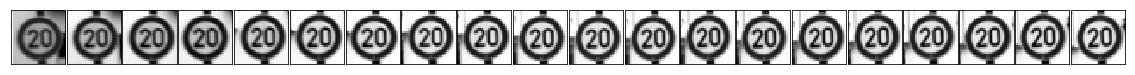

1. Speed limit (30km/h)


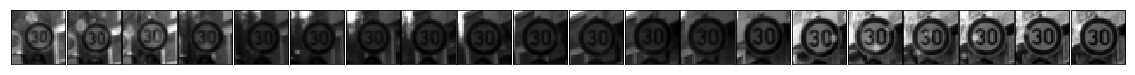

2. Speed limit (50km/h)


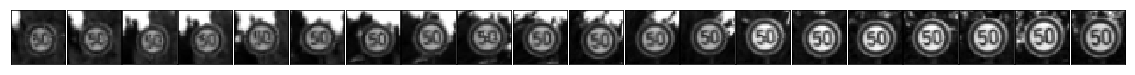

In [17]:
# Visualize normalized images

for x in range(3):
    show_class(sign_index=x, cmap='gray') 


#### Question 1

### Describe how you preprocessed the data. Why did you choose that technique?

#### Answer:

### My preprocessing steps are as follows

1. Convertion to grayscale. 
    I choose this after few rounds of experimentation. More accuracy was obtained on grayscale images when compared to color images. Grayscaling also reduces the size of the dataset to 1/3rd this making it easier for training. 
    
2. Normalizing the data in the range (-1,1). 
    Normalization is a must have preprocessing process, as explianed in the class. I choose this methord because it is fairly easy and also as it is shown in the lessons.




### Data augmentation

I am generating more data set by augmenting the existing dataset. Augmentation include random translation, scale, rotation and brightness. This will make my model better generalize the data rather than over fitting to the data.

#### 1. Translation

In [18]:
#Data augmentation

def image_translate(img, translation):
    '''
    Randomly translate the given image with the given amount
    '''
    rows, columns, depth = img.shape
    dx, dy = np.random.randint(-translation, translation, 2)
#     print(dx, dy)
    translation_matrix = np.float32([[1,0,dx], [0,1,dy]])
#     print(translation_matrix)
    trans_image = cv2.warpAffine(img, translation_matrix, (columns, rows))
#     print(trans_image)
    trans_image = trans_image[:,:,np.newaxis]
#     print(trans_image)
    return trans_image


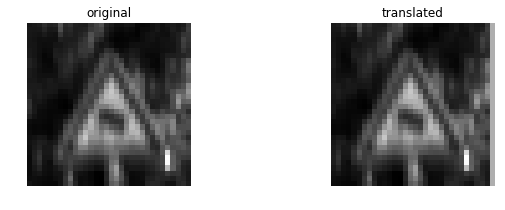

In [19]:
#Testing random translation

test_image = X_train[random.randint(0, X_test.shape[0])]

nw_img = image_translate(test_image, 2)
fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(nw_img.squeeze(), cmap='gray')
axs[1].set_title('translated')

#### 2. Scale

In [20]:
def image_scale(img, scale):
    '''
    Randomly scale the given image
    '''
    rows, columns = img.shape[0:2]
    px = np.random.randint(-scale, scale)
    
    # end locations
    end_points = np.float32([[px,px],[rows-px,px],[px,columns-px],[rows-px,columns-px]])

    # start locations
    start_points = np.float32([[0,0],[rows,0],[0,columns],[rows,columns]])
    
    scaling_matrix= cv2.getPerspectiveTransform(end_points,start_points)
#     print(scaling_matrix)
    
    scaled_image = cv2.warpPerspective(img, scaling_matrix, (columns, rows))
#     print(scaled_image.shape)
    scaled_image = scaled_image[:,:,np.newaxis]
    return scaled_image


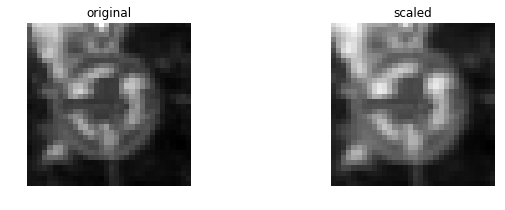

In [21]:
#Testing random scale

test_image = X_train[random.randint(0, X_test.shape[0])]

nw_img = image_scale(test_image,2)
fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(nw_img.squeeze(), cmap='gray')
axs[1].set_title('scaled')

#### 3.Shear

In [22]:
def image_shear(img, shear):
    '''
    Randomly shear the given image
    '''
    if shear == 0:
        return img
    rows, cols, channels = img.shape
    size = cols, rows
    left, right, top, bottom = shear, cols - shear, shear, rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    p1 = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    p2 = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    shear_matrix = cv2.getAffineTransform(p1,p2)
    shear_img = cv2.warpAffine(img, shear_matrix, size)
    shear_img = shear_img[:,:,np.newaxis]
    return shear_img


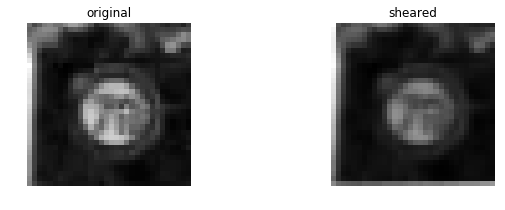

In [23]:
#Testing random skew

test_image = X_train[random.randint(0, X_test.shape[0])]

nw_img = image_shear(test_image, 2)
fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(nw_img.squeeze(), cmap='gray')
axs[1].set_title('sheared')

#### 4. Rotate

In [24]:
def image_rotate(img , angle):
    '''
    Randomly rotate the given image
    '''
    if angle == 0:
        return img
    angle = np.random.uniform(-angle, angle)
    rows, cols = img.shape[:2]
    size = cols, rows
    center = cols/2, rows/2
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_img = cv2.warpAffine(img, rotation_matrix, size)
    rotated_img = rotated_img[:,:, np.newaxis]
    return rotated_img

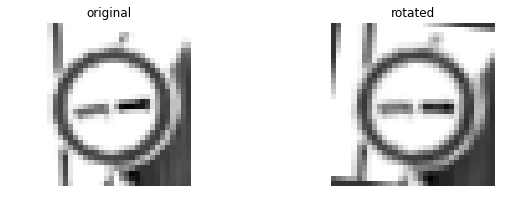

In [25]:
#Testing random rotation

test_image = X_train[random.randint(0, X_test.shape[0])]

nw_img = image_rotate(test_image, 10)
fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(nw_img.squeeze(), cmap='gray')
axs[1].set_title('rotated')

#### Combining all the augmentation methods into one method and testing it

In [26]:
def augment_image(img, translation, scale, shear, angle):
    img = image_translate(img, translation)
    img = image_scale(img, scale)
    img = image_shear(img, shear)
    img = image_rotate(img, angle)
    return img

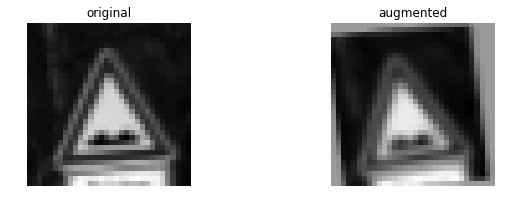

In [27]:
test_image = X_train[random.randint(0, X_test.shape[0])]

nw_img = augment_image(test_image, 2, 1, 1, 10)
fig, axs = plt.subplots(1,2, figsize=(10,3))

axs[0].axis('off')
axs[0].imshow(test_image.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(nw_img.squeeze(), cmap='gray')
axs[1].set_title('augmented')

## Augmenting data

The following lines of code randomly augments the dataset  by replacing the data. No new data sets are generated, instead the existing data is being augmented and replaced on the original image

In [28]:
#Todo augment all the dataset

augment_data = lambda x: augment_image(x, 2, 1, 1, 10)
print(X_train.shape)


(34799, 32, 32, 1)


#### Adding data to the training set
This code will generate additional images by augmenting existing data and adds to the dataset as new entries. Thus the size of the dataset will increase after this operation.

In [29]:
#print the bins, min and max for reference

# BIN_COUNT = np.bincount(y_train)
# MIN = np.min(np.bincount(y_train))
# MAX = np.max(np.bincount(y_train))

# print('bins :' , BIN_COUNT)
# print('min :' , MIN)
# print('max :' , MAX)

# print(y_train.dtype)

#### Add data to the existing dataset

In [30]:
# This is a simple method

# X_train = np.concatenate((X_train, np.array([augment_data(x) for x in X_train])))
# y_train = np.concatenate((y_train, y_train))          

In [31]:
# This method will normalize all bins

# for i, x in enumerate(BIN_COUNT):
#     data_needed = MAX - x
#     times_needed =  int(data_needed / x)
#     rem = data_needed % x
#     images = get_sample(i)
#     img_array = np.empty_like(images)
    
#     if(times_needed==0):
#         img_array = images[:rem]
#     else:
#         for j in range(times_needed-1):
#             img_array =np.concatenate((img_array, images))
#         img_array = np.concatenate((img_array, images[:rem]))
        
#     labels = np.array([i for a in range(data_needed)], dtype=np.int64)
    
#     if(img_array.shape[0] > 0):
#         X_train = np.concatenate((X_train, np.array([augment_data(b) for b in img_array])))
#         y_train = np.concatenate((y_train, labels))
    

In [32]:
#Print again to check the change

# print('bins :' , np.bincount(y_train))
# print('min :' , np.min(np.bincount(y_train)))
# print('max :' , np.max(np.bincount(y_train)))

#### Ploting histogram after data augmentation to see the distribution

In [33]:
#Colorful plot

# classes = [x for x in range(n_classes)]
# class_counts = [np.count_nonzero(y_train ==y) for y in classes]

# plt.figure(figsize=(20,4))

# sb.barplot(classes, class_counts, alpha=0.8, )
# plt.xlabel('Sign Class', fontsize=12)
# plt.ylabel('Number of Images', fontsize=12)
# plt.show()

In [34]:
# Shuffle the data to enhance generalization

X_train, y_train = shuffle(X_train, y_train)

In [35]:
# Creating a validation set from the trainig data

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(27839, 32, 32, 1) (27839,)
(6960, 32, 32, 1) (6960,)



#### Question 2

Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

#### Answer:

Data augmentation is a very effective method to make the network more robust and better generalize rather than to over fit the given data. Data augmentation can also generate more data which leads to better training and better results. 

I used random translation, scale, rotation and shear as methods to augment the data. I created a function - augment_image() which runs some or all of these function with a random value and finally transforms the image. 

First i used the augment_image method to augment and replace the actual data. Ie no new training data is created, rather each image in the data set is taken and augmented and replaced over the original image. But this method did not product very good results, rather the accuracy did declined a lot.

Next i created new datasets and appended them to the existing dataset thus increasing the size of the dataset

I also used the SciKit Learn train_test_split function to create a validation set out of the training set. I used 20% of the testing set to create the validation set.


### Model Architecture

In [36]:
# Defining the parameters

EPOCH = 50
LEARNING_RATE = .001
BATCH_SIZE = 100

In [37]:

def lenet(x):
    '''
    The original lenet architecture from class
    '''
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # the convolution kernal is of 5x5x1 and the output depth is 6
    W1 = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean= mu, stddev=sigma))
    x = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
    print('layer one shape', x.get_shape())
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, W2, strides=[1,1,1,1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
    
    print('layer two shape', x.get_shape())
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    b3 = tf.Variable(tf.zeros(120))
    x = tf.add(tf.matmul(x, W3), b3)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(84))
    x = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    b5 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits

#### Implementing a modified version of lenet architecture

In [38]:
# adapted from Sermanet/LeCunn traffic sign classification journal article

def myLenet(x):
    '''
    Modified lenet architecture
    '''
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, W1, strides=[1,1,1,1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x,b1)
    
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=[5,5,6,16], mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, W2, strides=[1,1,1,1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x,b2)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5,5,16,400), mean=mu, stddev=sigma))
    x = tf.nn.conv2d(x, W3, strides=[1,1,1,1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400))
    x = tf.nn.bias_add(x, b3)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
        
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    
    # Dropout
    tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean=mu, stddev=sigma))
    b4 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits

In [39]:
tf.reset_default_graph()

# Defining the placeholders
x = tf.placeholder(tf.float32, (None, 32,32,1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
y_one_hot = tf.one_hot(y, 43)

In [40]:
logits = myLenet(x)
cross_entrophy = tf.nn.softmax_cross_entropy_with_logits(labels = y_one_hot, logits= logits)
loss = tf.reduce_mean(cross_entrophy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
train = optimizer.minimize(loss)

In [43]:
correct_predictions = tf.equal(tf.argmax(logits,1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


In [44]:
training_accuracy_array = []
validation_accuracy_array = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    for i in range(EPOCH):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(train, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        training_accuracy = evaluate(X_train, y_train)
        training_accuracy_array.append(training_accuracy)
        validation_accuracy = evaluate(X_validation, y_validation)
        validation_accuracy_array.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    saver.save(sess, './lenet.ckpt')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.910
Validation Accuracy = 0.903
EPOCH 2 ...
Training Accuracy = 0.953
Validation Accuracy = 0.945
EPOCH 3 ...
Training Accuracy = 0.970
Validation Accuracy = 0.954
EPOCH 4 ...
Training Accuracy = 0.989
Validation Accuracy = 0.975
EPOCH 5 ...
Training Accuracy = 0.991
Validation Accuracy = 0.977
EPOCH 6 ...
Training Accuracy = 0.990
Validation Accuracy = 0.977
EPOCH 7 ...
Training Accuracy = 0.994
Validation Accuracy = 0.980
EPOCH 8 ...
Training Accuracy = 0.996
Validation Accuracy = 0.984
EPOCH 9 ...
Training Accuracy = 0.996
Validation Accuracy = 0.983
EPOCH 10 ...
Training Accuracy = 0.994
Validation Accuracy = 0.982
EPOCH 11 ...
Training Accuracy = 0.997
Validation Accuracy = 0.983
EPOCH 12 ...
Training Accuracy = 0.997
Validation Accuracy = 0.985
EPOCH 13 ...
Training Accuracy = 0.999
Validation Accuracy = 0.987
EPOCH 14 ...
Training Accuracy = 0.996
Validation Accuracy = 0.984
EPOCH 15 ...
Training Accuracy = 0.997
Validation Accuracy

In [45]:
def plot_graph(training_values, validation_values):

    implot = plt.figure(figsize=(16,6))
#     plt.subplot(1,2,1)
    plt.plot(training_values, '-o')
    plt.plot(validation_values, '-o')
    plt.legend(['training_accuracy', 'validation_accuracy'], loc='lower right')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

    plt.show()

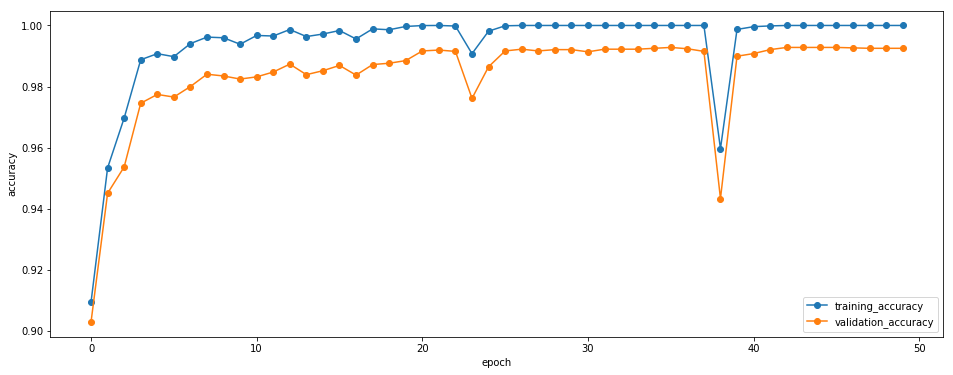

In [46]:
plot_graph(training_accuracy_array, validation_accuracy_array)

## Summary

### **Test number**: 1
**Preprocessing**: grayscale, normalization  
**Model**: Original LeNet  
**Parameters**: EPOCH = 50, LEARNING_RATE = .01, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.75, Data augmentation: No  
**Validation accuracy**: 0.870  
    
----

### **Test number**: 2
**Preprocessing**: grayscale, normalization  
**Model**: Original LeNet  
**Parameters**: EPOCH = 100, LEARNING_RATE = .01, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.75, Data augmentation: No  
**Validation accuracy**: 0.855  

----

### **Test numbe**r: 3
**Preprocessing**: normalization  
**model**: Original LeNet  
**Parameters**: EPOCH = 50, LEARNING_RATE = .01, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.75, Data augmentation: No  
**Validation accuracy**: 0.854  

----

***Inference : Original Lenet was giving me terrible performance so i moved to a modified version of lenet***

----

### **Test number**: 4
**Preprocessing**: normalization  
**model**: Modified LeNet  
**Parameters**: EPOCH = 50, LEARNING_RATE = .01, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.75, Data augmentation: No  
**Validation accuracy**: 0.882  
    
----

### **Test number**: 5
**Preprocessing**:grayscale, normalization  
**model**: Original LeNet  
**Parameters**: EPOCH = 50, LEARNING_RATE = .01, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.75, Data augmentation: Augmented all data  
**Validation accuracy**: 0.772 

----

### **Test number**: 6
**Preprocessing**:grayscale, normalization  
**model**: Modified LeNet  
**Parameters**: EPOCH = 50, LEARNING_RATE = .01, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.75, Data augmentation: Augmented all data  
**Validation accuracy**: 0.913

----

***Inference : Is seems like the modified lenet always out performs the original lenet, so i am deciding to constrain my experimentation with modified lenet alone. Increasing the EPOCH to 100 does not have much impact on the accuracy, also batch size of 100 looks good. Thus i am finalizing on the EPOCH to be 50 and batch size to be 100. Grayscale image have significent advantage over 3 channel color images, fixing that too.***

----

### **Test number**: 7
**Preprocessing**: ~~grayscale, normalization~~  
**model**: ~~Modified LeNet~~  
**Parameters**: ~~EPOCH = 50~~, LEARNING_RATE = .001, ~~BATCH_SIZE = 100~~, ~~mu: 0~~, ~~sigma: 0.1~~, keep_prob: 0.5, Data augmentation: None  
**Validation accuracy**: 0.993

----

### **Test number**:  8
**Preprocessing**: ~~grayscale, normalization~~  
**model**: ~~Modified LeNet~~  
**Parameters**: ~~EPOCH = 100~~, LEARNING_RATE = .0001, ~~BATCH_SIZE = 100~~, ~~mu: 0~~, ~~sigma: 0.1~~, keep_prob: 0.5, Data augmentation: Data set twised with data augmentation  
**Validation accuracy**: 0.969

----

### **Test number**:  9
**Preprocessing**: ~~grayscale, normalization~~  
**model**: ~~Modified LeNet~~  
**Parameters**: ~~EPOCH = 100~~, LEARNING_RATE = .001, ~~BATCH_SIZE = 100~~, ~~mu: 0~~, ~~sigma: 0.1~~, keep_prob: 0.5, Data augmentation: Data set equalized with data augmentation  
**Validation accuracy**: 0.912

----

***Inference : Seems like the data augmentation did not do any good. Modified lenet without data augmentation gave better results companred to it with augmentation.***

----

### Final Test 
### **Test number**:  10
**Preprocessing**: grayscale, normalization  
**model**: Modified LeNet   
**Parameters**: EPOCH = 50, LEARNING_RATE = .001, BATCH_SIZE = 100, mu: 0, sigma: 0.1, keep_prob: 0.5, Data augmentation: None  
**Validation accuracy**: 0.993

----

### Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [47]:
with tf.Session() as sess:
    saver.restore(sess, "./lenet.ckpt")
    
    train_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(train_accuracy)) 
    
    valid_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy)) 
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy)) 
    
#     print(predicted_labels)

INFO:tensorflow:Restoring parameters from ./lenet.ckpt
Training Accuracy = 1.000
Validation Accuracy = 0.993
Test Accuracy = 0.931


In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test)
plot_confusion_matrix(cm, sign_names_df['ClassId'].values)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")